In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

**EDA**

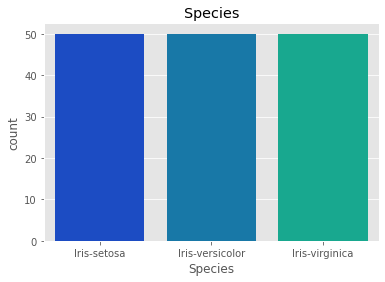

In [7]:
sns.countplot(df["Species"], palette = "winter")
plt.title("Species")
plt.show()

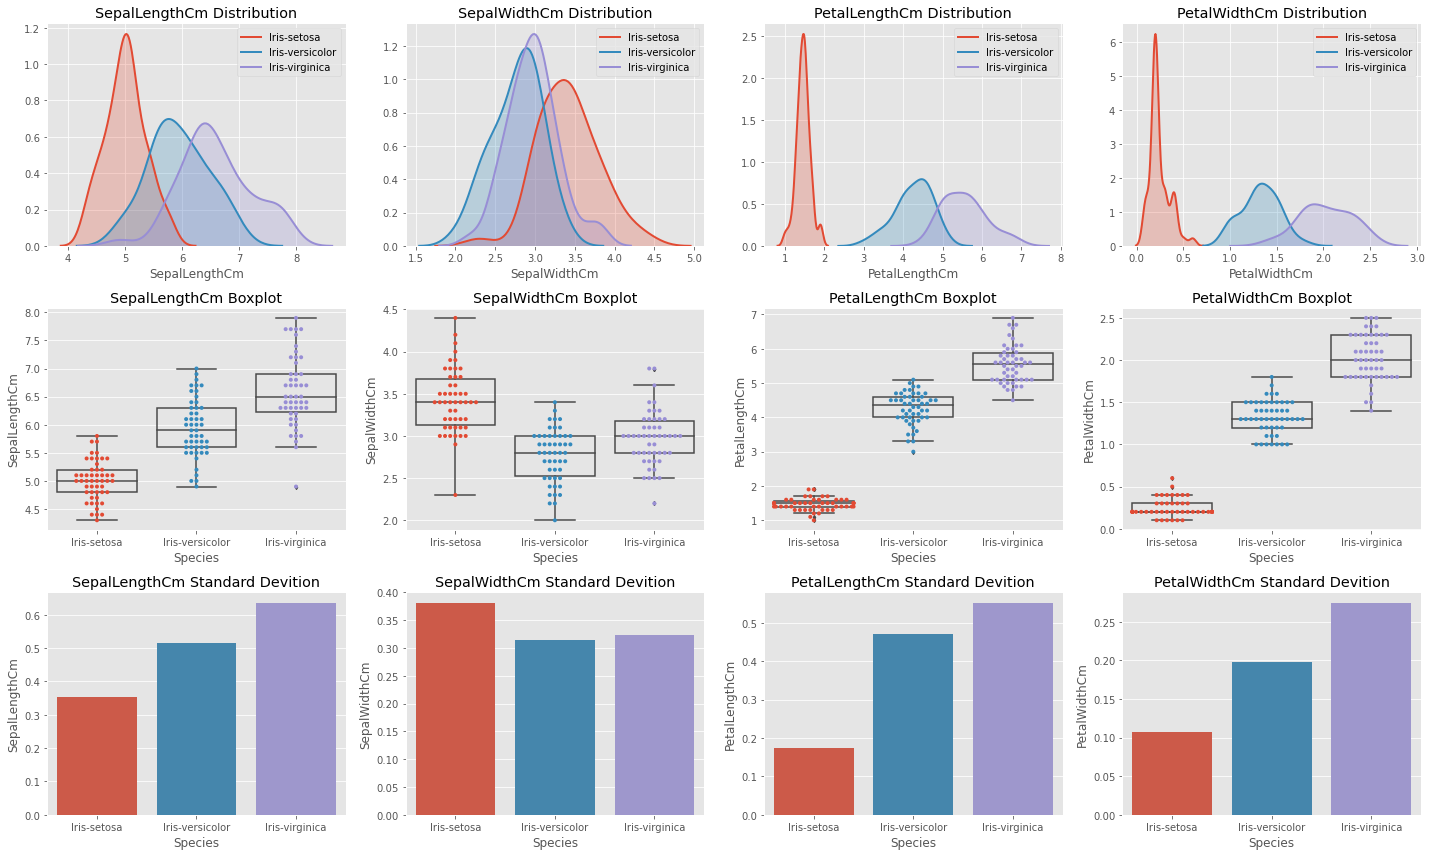

In [56]:
fig, ax = plt.subplots(3, 4, figsize = (20, 12))
columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
for col in range(len(columns)):
    sns.distplot(df[df["Species"] == "Iris-setosa"][columns[col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Iris-setosa", ax = ax[0, col])
    sns.distplot(df[df["Species"] == "Iris-versicolor"][columns[col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Iris-versicolor", ax = ax[0, col])
    sns.distplot(df[df["Species"] == "Iris-virginica"][columns[col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Iris-virginica", ax = ax[0, col])
    sns.boxplot(x = "Species", y = columns[col], data = df, fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Species", y = columns[col], data = df, size = 4, ax = ax[1, col])
    sns.barplot(x = "Species", y = columns[col], data = df.groupby("Species").std().reset_index(), ax = ax[2, col])
    ax[0, col].set_title(columns[col] + " Distribution")
    ax[1, col].set_title(columns[col] + " Boxplot")
    ax[2, col].set_title(columns[col] + " Standard Devition")
plt.tight_layout()
plt.show()
fig.savefig('data_distribution_species.png')

In [9]:
df = df.drop("Id", axis = 1)

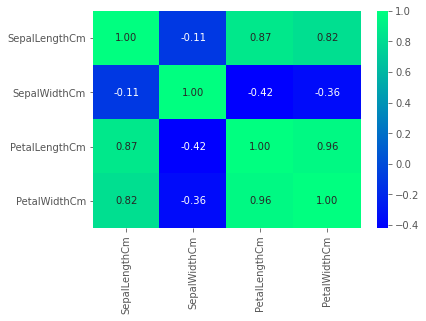

In [54]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "winter")
plt.show()

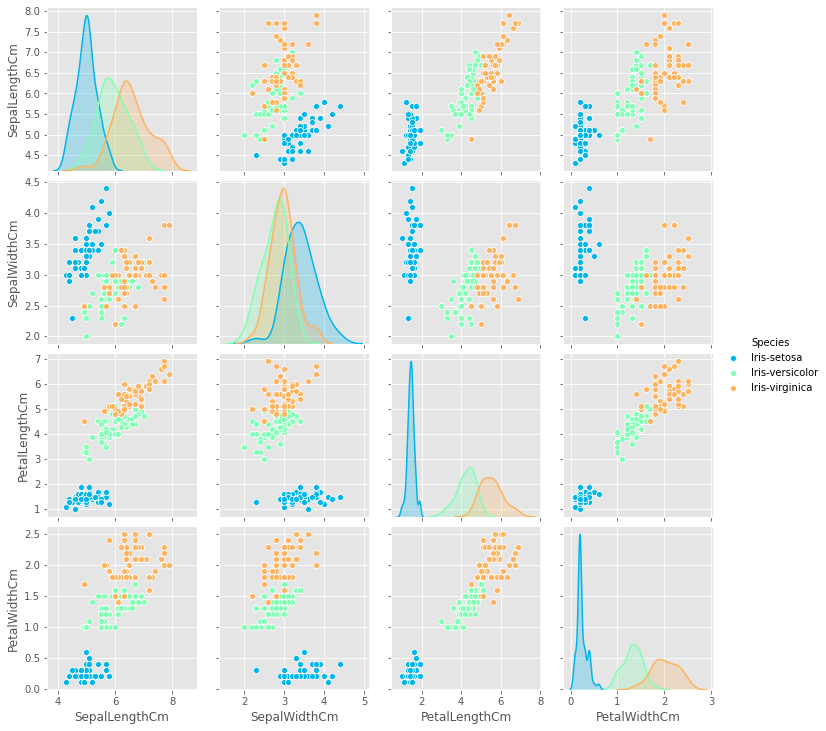

In [11]:
sns.pairplot(df, palette = "rainbow", hue = "Species")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("Species", axis = 1).values
y = df["Species"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**MODEL SELECTION**

In [14]:
# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [15]:
algorithm = {
    'Logistic Regression': LogisticRegression(solver = "saga", max_iter = 2000),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [16]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [17]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                 })

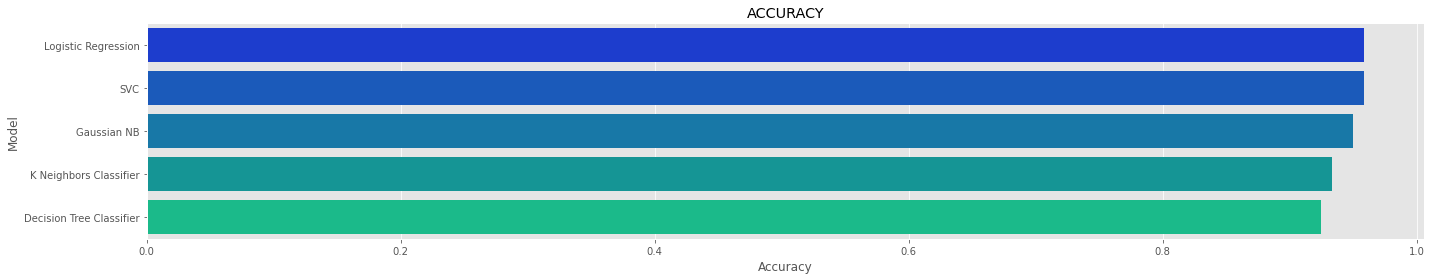

In [18]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
plt.figure(figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter')
plt.title("ACCURACY")
plt.tight_layout()
plt.show()

In [19]:
results

,Model,Accuracy,Accuracy Std
0,Logistic Regression,0.9583,0.0559
1,K Neighbors Classifier,0.9333,0.0624
2,SVC,0.9583,0.0559
3,Gaussian NB,0.9500,0.0553
4,Decision Tree Classifier,0.9250,0.0583


**LOGISTIC REGRESSION**

In [20]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000)
parameters = {"C": np.linspace(0.2, 1, 5), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(lr, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=5000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [21]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
27,0.144671,0.02894,0.001096,0.0013,1,0.6,"{'C': 1.0, 'l1_ratio': 0.6000000000000001}",0.916667,1.0,0.916667,...,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,0.972222,0.972222,0.966667,0.006142


In [22]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 1, l1_ratio = 0.6)
lr.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=0.6, max_iter=5000, penalty='elasticnet',
                   solver='saga')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.92      0.94        37
 Iris-virginica       0.93      0.98      0.96        44

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



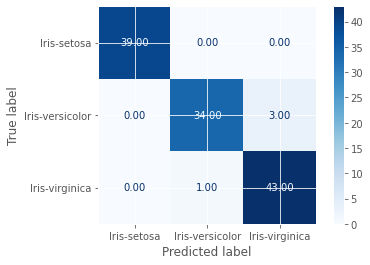

In [23]:
y_pred = lr.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(lr, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [24]:
knn = KNeighborsClassifier()
parameters = {"p": [1, 2], "n_neighbors": list(range(1, 21)), "leaf_size": np.linspace(20, 40, 21)}
gscv = GridSearchCV(knn, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40.]),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             scoring='accuracy')

In [25]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
703,0.001108,0.001041,0.001583,0.000674,37,12,2,"{'leaf_size': 37.0, 'n_neighbors': 12, 'p': 2}",0.916667,1.0,...,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.966667,0.055277,1
823,0.001098,0.000831,0.001894,0.000698,40,12,2,"{'leaf_size': 40.0, 'n_neighbors': 12, 'p': 2}",0.916667,1.0,...,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.966667,0.055277,1
423,0.001000,0.000451,0.002391,0.001556,30,12,2,"{'leaf_size': 30.0, 'n_neighbors': 12, 'p': 2}",0.916667,1.0,...,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.966667,0.055277,1
627,0.001195,0.000599,0.003092,0.001133,35,14,2,"{'leaf_size': 35.0, 'n_neighbors': 14, 'p': 2}",0.916667,1.0,...,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.966667,0.055277,1
387,0.000798,0.000399,0.001996,0.000774,29,14,2,"{'leaf_size': 29.0, 'n_neighbors': 14, 'p': 2}",0.916667,1.0,...,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,0.966667,0.055277,1


In [26]:
knn = KNeighborsClassifier(n_neighbors = 12, leaf_size = 30, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.95      0.96        37
 Iris-virginica       0.96      0.98      0.97        44

       accuracy                           0.97       120
      macro avg       0.98      0.97      0.98       120
   weighted avg       0.98      0.97      0.97       120



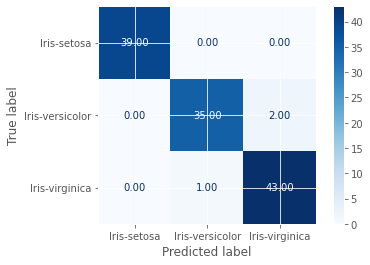

In [27]:
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(knn, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [28]:
svc = SVC()
parameters = {"C": [1, 2, 3], "kernel": ("linear", "poly", "rbf", "sigmoid")}
gscv = GridSearchCV(svc, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [29]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001597,0.001026,0.001100,0.001376,1,linear,"{'C': 1, 'kernel': 'linear'}",0.916667,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.833333,0.916667,0.958333,0.055902,1
2,0.001097,0.000537,0.000698,0.000779,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.833333,0.916667,0.958333,0.055902,1
4,0.001000,0.000450,0.000498,0.000498,2,linear,"{'C': 2, 'kernel': 'linear'}",0.916667,1.0,0.833333,1.0,1.0,1.0,1.0,1.0,0.916667,0.916667,0.958333,0.055902,1
6,0.001295,0.000455,0.000897,0.000941,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.833333,0.916667,0.958333,0.055902,1
10,0.001196,0.000398,0.000102,0.000307,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.916667,1.0,0.916667,1.0,1.0,1.0,1.0,1.0,0.833333,0.916667,0.958333,0.055902,1


In [30]:
svc = SVC(C = 1, kernel = "linear")
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      0.92      0.96        37
 Iris-virginica       0.94      1.00      0.97        44

       accuracy                           0.97       120
      macro avg       0.98      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120



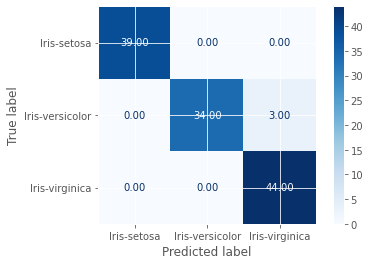

In [31]:
y_pred = svc.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svc, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.92      0.92      0.92        37
 Iris-virginica       0.93      0.93      0.93        44

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



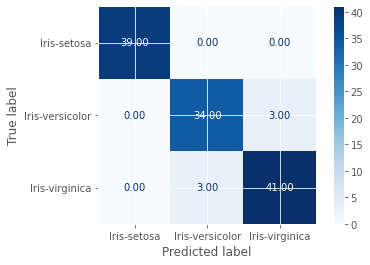

In [33]:
y_pred = gnb.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(gnb, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [34]:
dct = DecisionTreeClassifier()
parameters = {"criterion": ("gini", "entropy"), "max_depth": list(range(1, 11)), "min_samples_split": list(range(2, 11)), "min_samples_leaf": list(range(1, 11))}
gscv = GridSearchCV(dct, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [35]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
729,0.000700,0.000459,0.001152,0.002825,gini,9,2,2,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",1.000000,...,1.0,1.0,1.0,0.916667,1.0,0.916667,0.916667,0.950000,0.055277,1
1359,0.001394,0.000662,0.001397,0.001197,entropy,6,2,2,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",1.000000,...,1.0,1.0,1.0,0.916667,1.0,0.916667,0.916667,0.950000,0.055277,1
463,0.000716,0.000472,0.000598,0.000489,gini,6,2,6,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.916667,...,1.0,1.0,1.0,0.916667,1.0,0.916667,0.916667,0.941667,0.053359,3
1188,0.001096,0.000537,0.000699,0.000458,entropy,4,3,2,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.916667,...,1.0,1.0,1.0,0.916667,1.0,0.916667,0.916667,0.941667,0.053359,3
1187,0.000499,0.000669,0.000698,0.000639,entropy,4,2,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.916667,...,1.0,1.0,1.0,0.916667,1.0,0.916667,0.916667,0.941667,0.053359,3


In [36]:
dct = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 2, min_samples_split = 4)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.93      1.00      0.96        37
 Iris-virginica       1.00      0.93      0.96        44

       accuracy                           0.97       120
      macro avg       0.97      0.98      0.98       120
   weighted avg       0.98      0.97      0.98       120



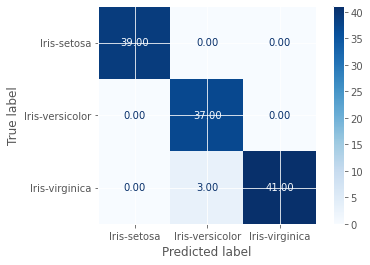

In [37]:
y_pred = dct.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(dct, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [38]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 1, l1_ratio = 0.6),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 12, leaf_size = 30, p = 2),
    'SVC': SVC(C = 1, kernel = "linear"),
    'Gaussian NB': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 2, min_samples_split = 4)
}

In [39]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [40]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                 })

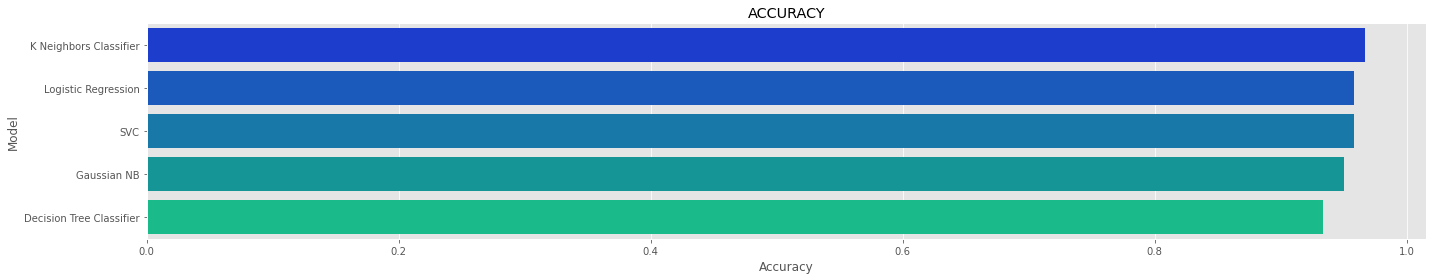

In [41]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
plt.figure(figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter')
plt.title("ACCURACY")
plt.tight_layout()
plt.show()

In [42]:
results

,Model,Accuracy,Accuracy Std
0,Logistic Regression,0.9583,0.0559
1,K Neighbors Classifier,0.9667,0.0553
2,SVC,0.9583,0.0559
3,Gaussian NB,0.9500,0.0553
4,Decision Tree Classifier,0.9333,0.0624


**ENSEMBLE - VOTING**

In [43]:
clf1 = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 1, l1_ratio = 0.6)
clf2 = KNeighborsClassifier(n_neighbors = 12, leaf_size = 30, p = 2)
clf3 = SVC(C = 1, kernel = "linear")
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 2, min_samples_split = 4)
eclf = VotingClassifier(estimators=[("lr", clf1), ("knn", clf2), ("svc", clf3), ("gnb", clf4), ("dct", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.92      0.94        37
 Iris-virginica       0.93      0.98      0.96        44

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



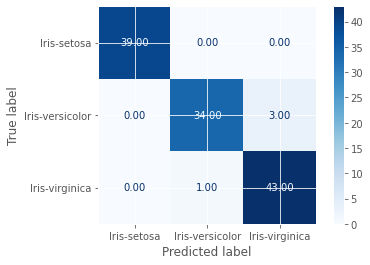

In [44]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()